In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.contour import QuadContourSet
import pandas as pd
import sunpy
import sunpy.map
from sunpy.coordinates import (get_earth, get_horizons_coord,
                                Helioprojective, propagate_with_solar_surface)
import sunkit_image
import sunkit_image.coalignment as coalignment
import sunkit_image.trace as trace
import astropy
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS
import astropy.units as u
import astropy.constants as const
from astropy.io import fits
from astropy.time import Time
import dkist

import cmcrameri.cm as cmcm
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.ticker import (AutoLocator, AutoMinorLocator, 
    FixedLocator, FixedFormatter, LogLocator, StrMethodFormatter)
from ipywidgets import interactive, widgets
from IPython.display import display, clear_output
from astropy.visualization import (AsinhStretch, LinearStretch,
        LogStretch, ImageNormalize)
import os
from copy import deepcopy   
from glob import glob
import h5py
from tqdm import tqdm


In [53]:
vbi_dataset = dkist.load_dataset('../../src/DKIST/vbi_1024/BJOLO/')

In [54]:
vbi_dataset.dimensions

<Quantity [ 282., 4096., 4096.] pix>

In [55]:
vbi_dataset[0,:,:].data

dask.array<getitem, shape=(4096, 4096), dtype=float32, chunksize=(4096, 4096), chunktype=numpy.ndarray>

In [56]:
vbi_test_image = vbi_dataset[0,100:-100,100:-100].data.compute().reshape(974,4,974,4).mean(axis=(1,3))

In [91]:
loops_vbi = trace.occult2(-(vbi_test_image - np.nanmax(vbi_test_image)), nsm1=5, rmin=60, lmin=60, nstruc=1000, ngap=6, qthresh1=0.0, qthresh2=0.0)

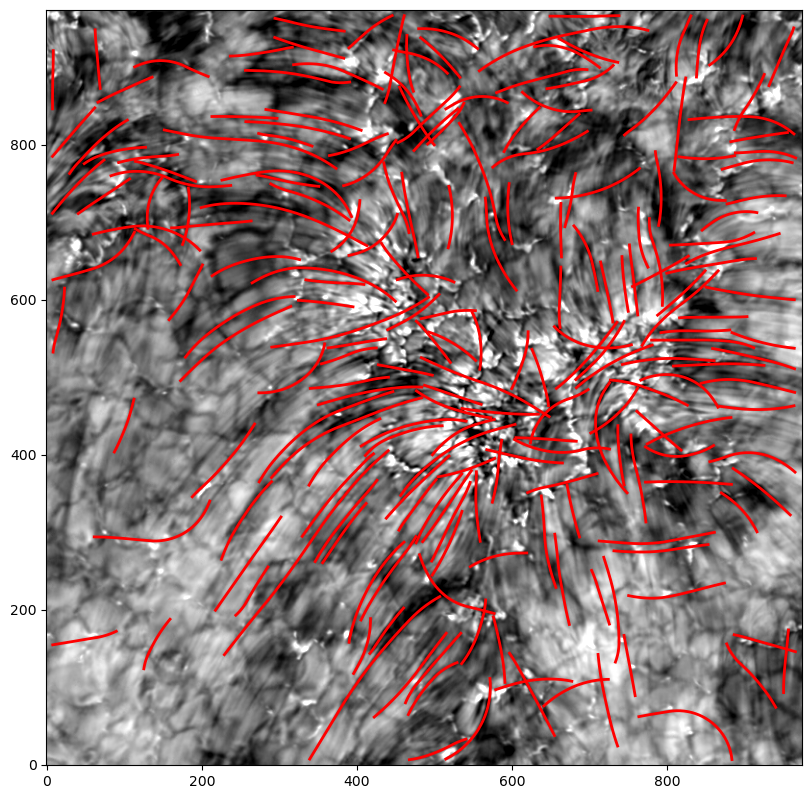

In [90]:
fig, ax = plt.subplots(layout='constrained', figsize=(8,8))
ax.imshow(vbi_test_image, origin='lower', norm = ImageNormalize(vmin=np.nanpercentile(vbi_test_image, 1),
                                                                vmax=np.nanpercentile(vbi_test_image, 99),
                                                                ),
                                        cmap='grey')

for loop in loops_vbi:
    loop = np.array(loop)
    ax.plot(loop[:,0], loop[:,1], color='r', lw=2)